## Classifying spam vs. email

In [2]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn import metrics, linear_model
import pandas as pd
from sklearn.utils import shuffle
from scipy import stats
from sklearn.feature_selection import chi2



%matplotlib inline
plt.style.use('bmh')

In [3]:
spam = pd.read_csv('C:/Users/fisol/Desktop/Class Docs/DATA 803/Python II - Johnson/Class 2/HW2/spambase/spambase.names.csv') #delimiter=' ')

In [4]:
spam.shape#[:5]

(4601, 58)

In [5]:
spam = shuffle(spam, random_state=0)

In [6]:
spam.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

In [7]:
X = spam[['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       'word_freq_edu:', 'word_freq_table:', 'word_freq_conference:',
       'char_freq_;:', 'char_freq_(:', 'char_freq_[:', 'char_freq_!:',
       'char_freq_$:', 'char_freq_#:', 'capital_run_length_average:',
       'capital_run_length_longest:', 'capital_run_length_total:']]
y = spam['Spam']

<h1><span style="text-decoration: underline;">MODEL 1</span></h1>

In [8]:
X1tr, X1te, ytr1, yte1 = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
print(np.sum(ytr1) / len(ytr1))
null_preds = np.ones(len(ytr1))

print('{:.3f}'.format(accuracy_score(ytr1, null_preds)))

0.3953804347826087
0.395


In [10]:
Model1 = LogisticRegression().fit(X1tr, ytr1)

In [11]:
Model1.coef_

array([[ -2.30838285e-01,  -1.36121076e-01,   7.47128391e-02,
          7.81144134e-01,   6.23004094e-01,   1.01743166e+00,
          2.00503448e+00,   5.95583454e-01,   6.53732047e-01,
          1.11847126e-01,  -2.55244154e-01,  -1.32322981e-01,
         -1.13847509e-01,   1.28925077e-01,   9.44617986e-01,
          9.76701535e-01,   8.42959877e-01,   1.29037930e-01,
          9.54222798e-02,   8.37546554e-01,   2.42288866e-01,
          3.06457133e-01,   1.81222346e+00,   9.83711560e-01,
         -1.84867680e+00,  -9.64306653e-01,  -3.99651943e+00,
          3.66546943e-01,  -1.23798568e+00,  -2.00509854e-01,
         -2.78228898e-01,  -9.08852366e-03,  -9.97542668e-01,
          2.17008221e-02,  -1.10317616e+00,   8.66183993e-01,
         -1.45686273e-01,  -5.08303038e-01,  -7.39860065e-01,
         -7.13546170e-02,  -1.38959589e+00,  -1.81622831e+00,
         -8.61837775e-01,  -1.15274073e+00,  -6.85101599e-01,
         -1.22137950e+00,  -8.43860831e-01,  -1.75839089e+00,
        

In [12]:
preds1 = Model1.predict(X1tr)
prob_preds1 = Model1.predict_proba(X1tr)

In [13]:
Model1.score(X1tr, ytr1, sample_weight=None)

0.93233695652173909

In [14]:
pd.DataFrame(confusion_matrix(ytr1, preds1))#.apply(lambda x: (x / sum(x))*100, axis=1)

,0,1
0,2123,102
1,147,1308


In [15]:
dsp=pd.DataFrame(confusion_matrix(ytr1, preds1)).apply(lambda x: x / sum(x), axis=1)
# dsp.plot(kind='bar', stacked=True)

In [16]:
print(metrics.classification_report(ytr1, preds1)) #Model 1

             precision    recall  f1-score   support

          0       0.94      0.95      0.94      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680



In [17]:
def plot_roc(actual, predicted):
    fpr, tpr, thr = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    figsize(12, 8)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (Class 1)')
    plt.legend(loc="lower right");
    return

<h1><span style="text-decoration: underline;">MODEL 2</span></h1>

In [229]:
X2 = spam[['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 
       'word_freq_edu:', 'word_freq_table:', 'word_freq_conference:',
       'char_freq_;:', 'char_freq_(:', 'char_freq_[:', 'char_freq_!:',
       'char_freq_$:', 'char_freq_#:', 'capital_run_length_average:',
       'capital_run_length_longest:', 'capital_run_length_total:']]

In [230]:
X2tr, X2te, ytr2, yte2 = train_test_split(X2, y, test_size=0.2, random_state=0)

In [231]:
Model2 = LogisticRegression().fit(X2tr, ytr2)

In [232]:
Model2.score(X2tr, ytr2, sample_weight=None)

0.88342391304347823

In [233]:
preds2 = Model2.predict(X2tr)
prob_preds2 = Model2.predict_proba(X2tr)

In [234]:
accuracy_score(ytr2, preds2)

0.88342391304347823

In [235]:
pd.DataFrame(confusion_matrix(ytr2, preds2))

,0,1
0,2110,115
1,314,1141


In [236]:
# dsp=pd.DataFrame(confusion_matrix(ytr2, preds2)).apply(lambda x1: x1 / sum(x1), axis=1)
# dsp.plot(kind='bar', stacked=True)

In [237]:
print(metrics.classification_report(ytr2, preds2)) #Model 2

             precision    recall  f1-score   support

          0       0.87      0.95      0.91      2225
          1       0.91      0.78      0.84      1455

avg / total       0.89      0.88      0.88      3680



<h1><span style="text-decoration: underline;">MODEL 3</span></h1>

In [238]:
X3 = spam[['word_freq_make:', 'word_freq_address:', 'word_freq_all:','word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:', 'word_freq_mail:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_addresses:', 'word_freq_free:', 'word_freq_business:', 'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:', 'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:', 'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:','word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:', 'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:', 'word_freq_edu:', 'word_freq_table:', 'word_freq_conference:',
       'char_freq_;:', 'char_freq_(:', 'char_freq_[:', 'char_freq_!:', 'char_freq_$:', 'char_freq_#:', 'capital_run_length_average:',
       'capital_run_length_longest:', 'capital_run_length_total:']]

In [239]:
X3tr, X3te, ytr3, yte3 = train_test_split(X3, y, test_size=0.2, random_state=0)

In [240]:
Model3 = LogisticRegression().fit(X3tr, ytr3)

In [241]:
Model3.score(X3tr, ytr3, sample_weight=None)

0.93288043478260874

In [242]:
preds3 = Model3.predict(X3tr)
prob_preds3 = Model3.predict_proba(X3tr)

In [243]:
accuracy_score(ytr3, preds3)

0.93288043478260874

In [244]:
pd.DataFrame(confusion_matrix(ytr3, preds3))

,0,1
0,2125,100
1,147,1308


In [245]:
print(metrics.classification_report(ytr3, preds3))  #Model 3

             precision    recall  f1-score   support

          0       0.94      0.96      0.95      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680



In [246]:
Model3.score(X3tr, ytr3, sample_weight=None)  #Model 3 Score

0.93288043478260874

<h1><span style="text-decoration: underline;">Model 4</span></h1>

In [247]:
X4 = spam[['word_freq_make:', 'word_freq_address:', 'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:','word_freq_will:',
       'word_freq_people:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:','word_freq_data:','word_freq_85:', 'word_freq_technology:','word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       'word_freq_edu:', 'word_freq_table:', 'word_freq_conference:',
       'char_freq_;:', 'char_freq_(:', 'char_freq_[:', 'char_freq_!:',
       'char_freq_$:', 'char_freq_#:', 'capital_run_length_average:',
       'capital_run_length_longest:', 'capital_run_length_total:']]

In [248]:
X4tr, X4te, ytr4, yte4 = train_test_split(X4, y, test_size=0.2, random_state=0)

In [249]:
Model4 = LogisticRegression().fit(X4tr, ytr4)

In [250]:
Model4.score(X4tr, ytr4, sample_weight=None)  #Model 4 Score

0.93369565217391304

In [251]:
preds4 = Model4.predict(X4tr)
prob_preds4 = Model4.predict_proba(X4tr)

In [252]:
pd.DataFrame(confusion_matrix(ytr4, preds4))

,0,1
0,2132,93
1,151,1304


In [253]:
print(metrics.classification_report(ytr4, preds4))  #Model 4

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680



<h1><span style="text-decoration: underline;">Model 5</span></h1>

In [254]:
# model_logit = sm.Logit(y, X).fit()
# model_logit.summary()

In [255]:
X5 = spam[['word_freq_make:', 'word_freq_address:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_will:','word_freq_free:', 'word_freq_business:',
       'word_freq_you:', 'word_freq_data:',
       'word_freq_85:', 'word_freq_pm:','word_freq_meeting:',
       'word_freq_project:', 'word_freq_re:','word_freq_your:',
       'word_freq_000:', 'word_freq_money:','word_freq_george:',
        'word_freq_650:', 'word_freq_lab:','word_freq_credit:',
       'word_freq_edu:', 'word_freq_hpl:',
         'word_freq_conference:','word_freq_hp:',
       'char_freq_;:', 'char_freq_(:','char_freq_!:',
       'char_freq_$:','capital_run_length_longest:', 'capital_run_length_total:']]

In [256]:
X5tr, X5te, ytr5, yte5 = train_test_split(X5, y, test_size=0.2, random_state=0)

In [257]:
Model5 = LogisticRegression().fit(X5tr, ytr5)

In [258]:
Model5.score(X5tr, ytr5, sample_weight=None)  #Model 5 Score

0.92581521739130435

In [259]:
preds5 = Model5.predict(X5tr)
prob_preds5 = Model5.predict_proba(X5tr)

In [260]:
pd.DataFrame(confusion_matrix(ytr5, preds5))#.apply(lambda x: (x / sum(x))*100, axis=1)

,0,1
0,2118,107
1,166,1289


In [261]:
print(metrics.classification_report(ytr5, preds5))  #Model 5

             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2225
          1       0.92      0.89      0.90      1455

avg / total       0.93      0.93      0.93      3680



<h1><span style="text-decoration: underline;">Comparing Models</span></h1>

**Classification Report:**

In [262]:
print("MODEL 1: "'\n',metrics.classification_report(ytr1, preds1))  #Model 1
print("MODEL 2: "'\n',metrics.classification_report(ytr2, preds2))  #Model 2
print("MODEL 3: "'\n',metrics.classification_report(ytr3, preds3))  #Model 3
print("MODEL 4: "'\n',metrics.classification_report(ytr4, preds4))  #Model 4
print("MODEL 5: "'\n',metrics.classification_report(ytr5, preds5))  #Model 5

MODEL 1: 
              precision    recall  f1-score   support

          0       0.94      0.95      0.94      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680

MODEL 2: 
              precision    recall  f1-score   support

          0       0.87      0.95      0.91      2225
          1       0.91      0.78      0.84      1455

avg / total       0.89      0.88      0.88      3680

MODEL 3: 
              precision    recall  f1-score   support

          0       0.94      0.96      0.95      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680

MODEL 4: 
              precision    recall  f1-score   support

          0       0.93      0.96      0.95      2225
          1       0.93      0.90      0.91      1455

avg / total       0.93      0.93      0.93      3680

MODEL 5: 
              precision    recall  f1-score   support

          0       0.93      0.9

**Accuracy Scores & Column Sizes:**

In [263]:
print("MODEL 1: "'\n',"Accuracy Score: ",Model1.score(X1tr, ytr1, sample_weight=None))  #Model 1 Score
print("Shape of the Dataset: ", X1tr.shape) #model1
print("MODEL 2: "'\n',"Accuracy Score: ", Model2.score(X2tr, ytr2, sample_weight=None))  #Model 2 Score
print("Shape of the Dataset: ", X2tr.shape) #model2
print("MODEL 3: "'\n',"Accuracy Score: ", Model3.score(X3tr, ytr3, sample_weight=None)) #Model 3 Score
print("Shape of the Dataset: ", X3tr.shape) #Model3
print("MODEL 4: "'\n',"Accuracy Score: ",Model4.score(X4tr, ytr4, sample_weight=None))  #Model 4 Score
print("Shape of the Dataset: ", X4tr.shape) #Model4
print("MODEL 5: "'\n',"Accuracy Score: ", Model5.score(X5tr, ytr5, sample_weight=None))  #Model 5 Score
print("Shape of the Dataset: ", X5tr.shape) #Model5

MODEL 1: 
 Accuracy Score:  0.932336956522
Shape of the Dataset:  (3680, 57)
MODEL 2: 
 Accuracy Score:  0.883423913043
Shape of the Dataset:  (3680, 27)
MODEL 3: 
 Accuracy Score:  0.932880434783
Shape of the Dataset:  (3680, 53)
MODEL 4: 
 Accuracy Score:  0.933695652174
Shape of the Dataset:  (3680, 47)
MODEL 5: 
 Accuracy Score:  0.925815217391
Shape of the Dataset:  (3680, 33)


**Model 3:**

In [264]:
print('\n',"MODEL 1: "'\n',pd.DataFrame(confusion_matrix(ytr1, preds1)))   #model1
print('\n',"MODEL 2: "'\n',pd.DataFrame(confusion_matrix(ytr2, preds2)))   #model2
print('\n',"MODEL 3: "'\n',pd.DataFrame(confusion_matrix(ytr3, preds3)))   #model3
print('\n',"MODEL 4: "'\n',pd.DataFrame(confusion_matrix(ytr4, preds4)))   #model4
print('\n',"MODEL 5: "'\n',pd.DataFrame(confusion_matrix(ytr5, preds5)))   #model 5


 MODEL 1: 
       0     1
0  2123   102
1   147  1308

 MODEL 2: 
       0     1
0  2110   115
1   314  1141

 MODEL 3: 
       0     1
0  2125   100
1   147  1308

 MODEL 4: 
       0     1
0  2132    93
1   151  1304

 MODEL 5: 
       0     1
0  2118   107
1   166  1289


<b>Comparing the models above based on their accuracy, precision and recall values. Model 3 came out on top with the least amount of false positives which is a top priority for the purpose of detecting spam.</b>

<h1><span style="text-decoration: underline;">Running Model 4 on the Test Data</span></h1>

In [265]:
preds4_test = Model4.predict(X4te)
prob_preds4_test = Model4.predict_proba(X4te)

In [266]:
pd.DataFrame(confusion_matrix(yte4, preds4_test))

,0,1
0,539,24
1,45,313


In [267]:
disp = pd.DataFrame(confusion_matrix(yte4, preds4_test))

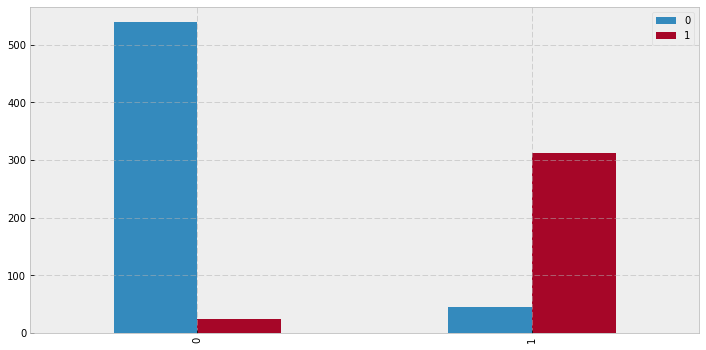

In [268]:
disp.plot(kind='bar')

In [269]:
accuracy_score(yte4, preds4_test)

0.92508143322475567

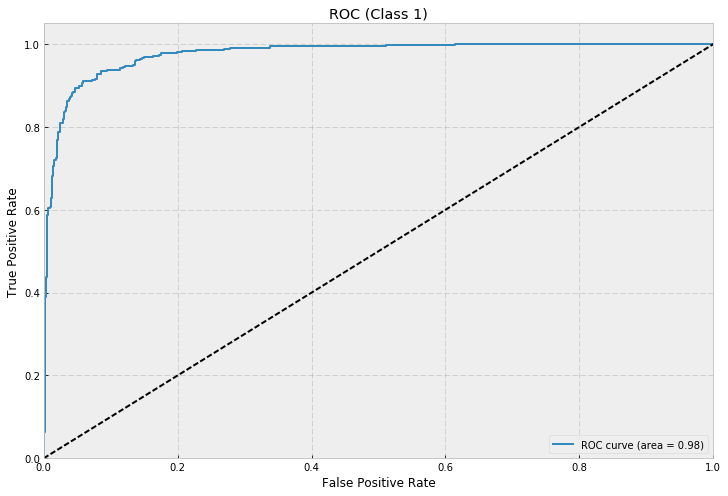

In [270]:
plot_roc(yte4, prob_preds4_test[:,1])

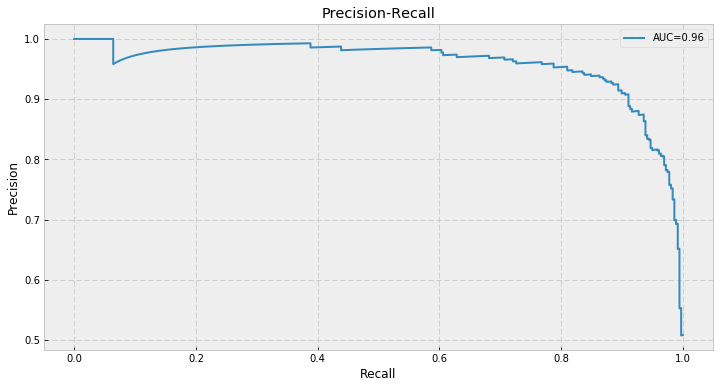

In [271]:
prec, rec, thresh = precision_recall_curve(yte4, prob_preds4_test[:,1])
figsize(12, 6)
plt.plot(rec, prec, label='AUC={0:0.2f}'.format(average_precision_score(yte4, prob_preds4_test[:,1])))
plt.title('Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best');

In [272]:
print(classification_report(yte4, preds4_test))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       563
          1       0.93      0.87      0.90       358

avg / total       0.93      0.93      0.92       921



<h1><span style="text-decoration: underline;">Comparing The Train predictions to the Test predictions</span></h1>

In [273]:
pd.DataFrame(confusion_matrix(yte4, preds4_test)).apply(lambda x: (x / sum(x))*100, axis=1)  #Test

,0,1
0,95.737123,4.262877
1,12.569832,87.430168


In [274]:
pd.DataFrame(confusion_matrix(ytr4, preds4)).apply(lambda x: (x / sum(x))*100, axis=1)   #Train

,0,1
0,95.820225,4.179775
1,10.378007,89.621993


In [275]:
accuracy_score(yte4, preds4_test)  #Test

0.92508143322475567

In [276]:
accuracy_score(ytr4, preds4)  #Train

0.93369565217391304